In [15]:
import pandas as pd
import numpy as np

### 구별 데이터 얻기

In [16]:
crime_analy_station = pd.read_csv('D:/data/02. crime_in_Seoul_raw.csv', index_col=0, encoding='utf-8')
crime_analy_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
구분,,,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,37.509435,127.066958
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,37.528511,127.126822
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,37.637388,127.027324
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,양천구,37.539783,126.829997
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,37.474379,126.950975


In [17]:
# pivot Table 사용, 구별로 정리
crime_analy_gu = pd.pivot_table(crime_analy_station, index='구별', aggfunc=np.sum)
# 필요없는 column 제거
del crime_analy_gu['lat']
del crime_analy_gu['lng']
crime_analy_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
관악구,407.0,497.0,17.0,19.0,13.0,12.0,1591.0,3367.0,4653.0,5428.0
광진구,234.0,279.0,6.0,11.0,4.0,4.0,1057.0,2636.0,2011.0,2392.0


In [5]:
# 검거율 생성
target = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
num = ['강간검거','강도검거','살인검거','절도검거','폭력검거']
den = ['강간발생','강도발생','살인발생','절도발생','폭력발생']

crime_analy_gu[target] = crime_analy_gu[num].div(crime_analy_gu[den].values) * 100
crime_analy_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,407.0,497.0,17.0,19.0,13.0,12.0,1591.0,3367.0,4653.0,5428.0,81.891348,89.473684,108.333333,47.252747,85.722181
광진구,234.0,279.0,6.0,11.0,4.0,4.0,1057.0,2636.0,2011.0,2392.0,83.870968,54.545455,100.000000,40.098634,84.071906


In [6]:
# 검거율 계산했으니 검거 건수는 삭제
del crime_analy_gu['강간검거']
del crime_analy_gu['강도검거']
del crime_analy_gu['살인검거']
del crime_analy_gu['절도검거']
del crime_analy_gu['폭력검거']

crime_analy_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,497.0,19.0,12.0,3367.0,5428.0,81.891348,89.473684,108.333333,47.252747,85.722181
광진구,279.0,11.0,4.0,2636.0,2392.0,83.870968,54.545455,100.000000,40.098634,84.071906


In [7]:
# 검거율 100 이상의 수치 >> 100으로 조정
crime_analy_gu[crime_analy_gu[target] > 100] = 100
crime_analy_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,497.0,19.0,12.0,3367.0,5428.0,81.891348,89.473684,100.000000,47.252747,85.722181
광진구,279.0,11.0,4.0,2636.0,2392.0,83.870968,54.545455,100.000000,40.098634,84.071906


In [8]:
# 칼럼 이름 간단하게 변경
crime_analy_gu.rename(
    columns={'강간발생':'강간', '강도발생':'강도','살인발생':'살인','절도발생':'절도','폭력발생':'폭력'},
    inplace=True
)
crime_analy_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,497.0,19.0,12.0,3367.0,5428.0,81.891348,89.473684,100.000000,47.252747,85.722181
광진구,279.0,11.0,4.0,2636.0,2392.0,83.870968,54.545455,100.000000,40.098634,84.071906


In [9]:
# 발생건수 정규화
# 정규화 방법 >> 칼럼값을 max 값으로 나눈다
col = ['살인','강도','강간','절도','폭력']
crime_analy_norm = crime_analy_gu[col] / crime_analy_gu[col].max()
crime_analy_norm.head()

,살인,강도,강간,절도,폭력
구별,,,,,
강남구,0.357143,1.000000,1.000000,0.977118,0.733773
강동구,0.285714,0.358974,0.310078,0.477799,0.463880
강북구,0.500000,0.128205,0.420543,0.332879,0.509351
관악구,0.857143,0.487179,0.963178,0.917189,0.995233
광진구,0.285714,0.282051,0.540698,0.718060,0.438577


In [10]:
# 검거율 데이터 추가
col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_analy_norm[col2] = crime_analy_gu[col2]
crime_analy_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,0.357143,1.000000,1.000000,0.977118,0.733773,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,0.285714,0.358974,0.310078,0.477799,0.463880,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,0.500000,0.128205,0.420543,0.332879,0.509351,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,0.857143,0.487179,0.963178,0.917189,0.995233,81.891348,89.473684,100.000000,47.252747,85.722181
광진구,0.285714,0.282051,0.540698,0.718060,0.438577,83.870968,54.545455,100.000000,40.098634,84.071906


In [13]:
result_CCTV = pd.read_csv('D:/data/02. CCTV_result.csv', encoding='euc-kr', index_col='구별')
crime_analy_norm[['인구수', 'CCTV']] = result_CCTV[['인구수','소계']]
crime_analy_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,0.357143,1.000000,1.000000,0.977118,0.733773,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238
강동구,0.285714,0.358974,0.310078,0.477799,0.463880,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010
강북구,0.500000,0.128205,0.420543,0.332879,0.509351,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831
관악구,0.857143,0.487179,0.963178,0.917189,0.995233,81.891348,89.473684,100.000000,47.252747,85.722181,520929,2109
광진구,0.285714,0.282051,0.540698,0.718060,0.438577,83.870968,54.545455,100.000000,40.098634,84.071906,372298,878


In [14]:
# 지표 데이터 추가
# 정규화된 범죄발생 건수 전체의 평균을 범죄의 대표값으로
col = ['강간','강도','살인','절도','폭력']
crime_analy_norm['범죄'] = np.mean(crime_analy_norm[col], axis=1)
crime_analy_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,0.357143,1.000000,1.000000,0.977118,0.733773,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238,0.813607
강동구,0.285714,0.358974,0.310078,0.477799,0.463880,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010,0.379289
강북구,0.500000,0.128205,0.420543,0.332879,0.509351,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831,0.378196
관악구,0.857143,0.487179,0.963178,0.917189,0.995233,81.891348,89.473684,100.000000,47.252747,85.722181,520929,2109,0.843984
광진구,0.285714,0.282051,0.540698,0.718060,0.438577,83.870968,54.545455,100.000000,40.098634,84.071906,372298,878,0.453020


In [18]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_analy_norm['검거'] = np.mean(crime_analy_norm[col], axis=1)
crime_analy_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,0.357143,1.000000,1.000000,0.977118,0.733773,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238,0.813607,84.328112
강동구,0.285714,0.358974,0.310078,0.477799,0.463880,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010,0.379289,85.255701
강북구,0.500000,0.128205,0.420543,0.332879,0.509351,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831,0.378196,76.664569
관악구,0.857143,0.487179,0.963178,0.917189,0.995233,81.891348,89.473684,100.000000,47.252747,85.722181,520929,2109,0.843984,80.867992
광진구,0.285714,0.282051,0.540698,0.718060,0.438577,83.870968,54.545455,100.000000,40.098634,84.071906,372298,878,0.453020,72.517393


In [24]:
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

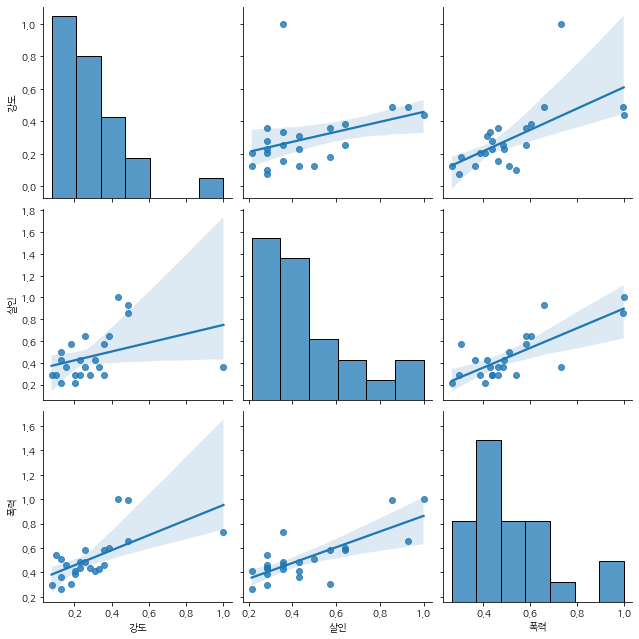

In [25]:
# 강도, 살인, 폭력 상관관계 확인
sns.pairplot(crime_analy_norm, vars=['강도','살인','폭력'], kind='reg', height=3)

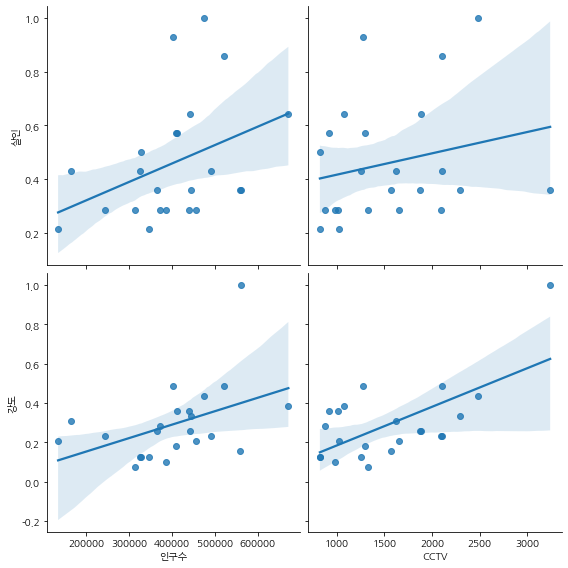

In [26]:
# 인구수, CCTV 수와 살인, 강도의 관계
def drawPlot():
    sns.pairplot(
        crime_analy_norm, x_vars=['인구수', 'CCTV'], y_vars=['살인','강도'], kind='reg', height=4
    )
    plt.show()

drawPlot()

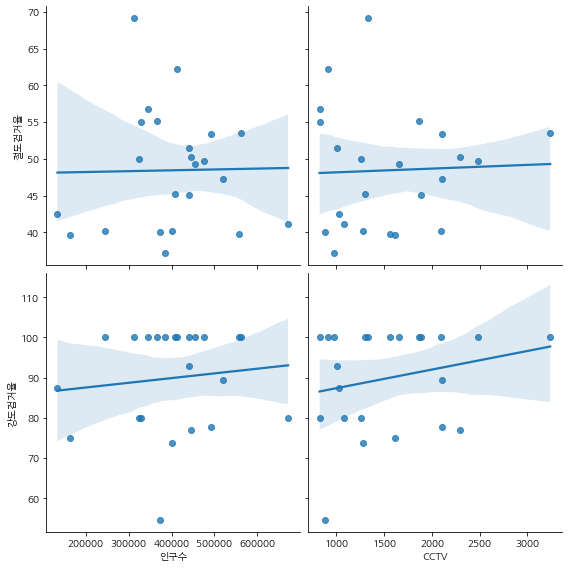

In [29]:
# 인구수, CCTV 와 절도,강도 검거율 관계
def drawPlot():
    sns.pairplot(
        crime_analy_norm,
        x_vars=['인구수','CCTV'],
        y_vars=['절도검거율','강도검거율'],
        kind='reg',
        height=4
    )
    plt.show()

drawPlot()

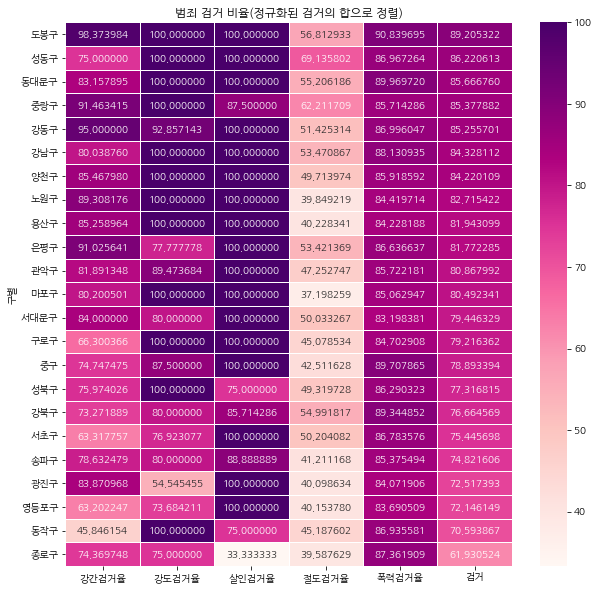

In [30]:
# 검거율만 가지고 heatmap 보기
# 정렬은 전거 검거율의 대표값 '검거'를 기준
def drawGraph():
    target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율','검거']
    
    crime_analy_norm_sort = crime_analy_norm.sort_values(by='검거', ascending=False)
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        crime_analy_norm_sort[target_col],
        annot = True,
        fmt = 'f',
        linewidths=0.5,
        cmap='RdPu'
    )
    plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬)')
    plt.show()
    
drawGraph()

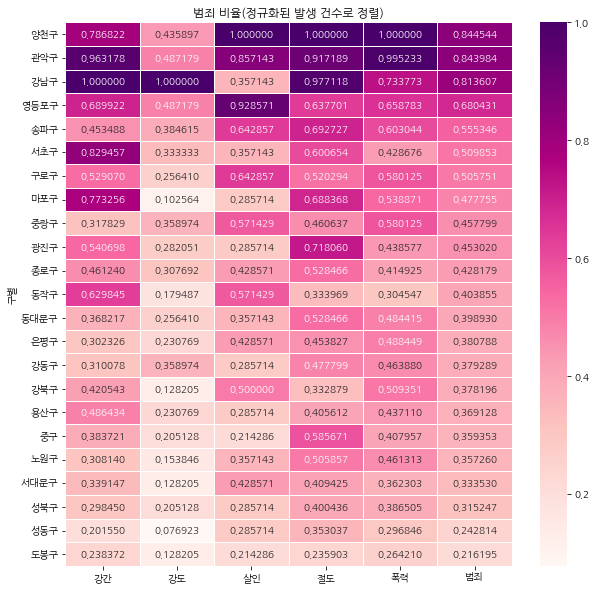

In [31]:
# 범죄발생 건수로 heatmap
# 대표값 범죄를 기준으로 정렬
def drawGraph():
    target_col = ['강간','강도','살인','절도','폭력','범죄']
    
    crime_analy_norm_sort = crime_analy_norm.sort_values(by='범죄', ascending=False)
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        crime_analy_norm_sort[target_col],
        annot = True,
        fmt = 'f',
        linewidths=0.5,
        cmap='RdPu'
    )
    plt.title('범죄 비율(정규화된 발생 건수로 정렬)')
    plt.show()
    
drawGraph()